In [6]:
import numpy as np
from scipy.integrate import odeint

# Define the system of ODEs
def system(y, t, alpha0, alpha, a, d, ap, dp, kappa, delta, gamma, Di_tot, Dj_tot):
    mi, Ri, Ai, mj, Rj, Aj = y

    # Differential equations for the "i" node
    dmi_dt = (Di_tot * (alpha0 + alpha*(a/d)*Ai)) / (1 + (a/d)*Ai + (ap/dp)*Ri) - delta * mi
    dRi_dt = kappa * mj - gamma * Ri
    dAi_dt = kappa * mi - gamma * Ai

    # Differential equations for the "j" node
    dmj_dt = (Dj_tot * (alpha0 + alpha*(a/d)*Aj)) / (1 + (a/d)*Aj + (ap/dp)*Rj) - delta * mj
    dRj_dt = kappa * mi - gamma * Rj
    dAj_dt = kappa * mj - gamma * Aj

    return [dmi_dt, dRi_dt, dAi_dt, dmj_dt, dRj_dt, dAj_dt]

# Parameters from the image provided
alpha0 = 0.25
alpha = 2
a = 1
d = 1
ap = 1
dp = 1
kappa = 5
delta = 1
gamma = 1

Di_tot = 1
Dj_tot = 2

# Initial conditions for mi, Ri, Ai, mj, Rj, Aj
# These should be provided based on your problem's initial state
initial_conditions = [0, 0, 0, 0, 0, 0]

# Time points at which to solve the ODEs
t = np.linspace(0, 10, 100)  # for example, from t=0 to t=10

# Solve ODEs
solution = odeint(system, initial_conditions, t, args=(alpha0, alpha, a, d, ap, dp,
                                                       kappa, delta, gamma, Di_tot, Dj_tot))



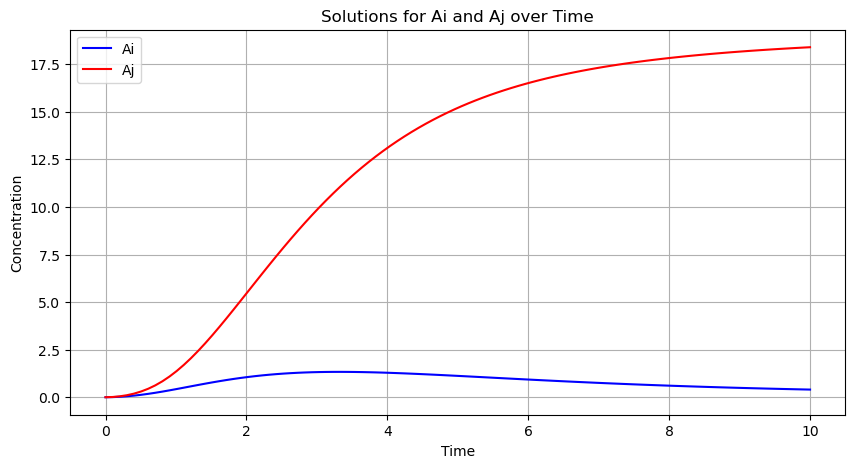

In [7]:
import matplotlib.pyplot as plt

Ai = solution[:, 2]
Aj = solution[:, 5]

# Plot Ai and Aj with time
plt.figure(figsize=(10, 5))
plt.plot(t, Ai, label='Ai', color='blue')
plt.plot(t, Aj, label='Aj', color='red')
plt.title('Solutions for Ai and Aj over Time')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()